In [ ]:
# Run Initial Preparation Notebook
# Run ML Preparation Notebook
%run app1_cust_seg_ml_prep.ipynb

In [22]:
# Import Libraries
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

In [ ]:
transformed_df  # Ready to Go Data

,map_categories__GroupType,map_categories__BookingUrgency,map_categories__HighDemand,map_categories__WaitingTimeCategory,num__IsCanceled,num__LeadTime,num__ArrivalDateYear,num__ArrivalDateMonth,num__ArrivalDateWeekNumber,num__ArrivalDateDayOfMonth,num__StaysInWeekendNights,num__StaysInWeekNights,num__Adults,num__Children,num__Babies,num__Meal,num__MarketSegment,num__DistributionChannel,num__IsRepeatedGuest,num__PreviousCancellations,num__PreviousBookingsNotCanceled,num__ReservedRoomType,num__AssignedRoomType,num__BookingChanges,num__DepositType,num__Agent,num__Company,num__DaysInWaitingList,num__CustomerType,num__ADR,num__RequiredCarParkingSpaces,num__TotalOfSpecialRequests,num__ReservationStatus,num__ReservationStatusYear,num__ReservationStatusMonth,num__ReservationStatusDay,num__TotalStay,num__SpendingPerPerson,num__LoyaltyScore,num__ChildRatio,num__Occupancy,num__CancellationRisk,cat__GroupType_Big_Group,cat__GroupType_Couple,cat__GroupType_Family,cat__GroupType_Single,cat__BookingUrgency_Early_Booking,cat__BookingUrgency_Last_Minute_Booking,cat__BookingUrgency_Medium_Term_Booking,cat__HighDemand_High,cat__HighDemand_Low,cat__WaitingTimeCategory_Long,cat__WaitingTimeCategory_Medium,cat__WaitingTimeCategory_Short
0,0.0,2.0,0.0,0.0,-0.656114,-0.874411,-1.902984,0.185429,0.027139,-1.676536,-0.962296,-0.170768,-1.646194,-0.298667,-0.071574,1.163539,-0.164441,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,-0.322338,-0.176568,-0.085664,-0.14545,-2.328143,-0.191229,-0.853375,0.573434,-1.879786,0.241861,-1.452015,-0.559220,-2.005682,-0.101771,-0.30974,-0.597570,-0.061833,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.524125,0.124226,-1.902984,0.185429,0.027139,-1.676536,-0.962296,1.088495,0.220775,-0.298667,-0.071574,-0.534495,0.601096,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,-0.255237,-0.176568,-0.085664,-0.14545,-0.727647,-0.191229,0.346106,-1.527907,-1.879786,0.241861,-1.680519,0.420197,-0.714124,-0.101771,-0.30974,-0.597570,-0.061833,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.524125,-0.155879,-1.902984,0.185429,0.027139,-1.676536,-0.962296,1.088495,-1.646194,-0.298667,-0.071574,-0.534495,0.601096,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,-0.255237,-0.176568,-0.085664,-0.14545,-0.905480,-0.191229,0.346106,-1.527907,-1.879786,-0.691841,1.632780,0.420197,0.290421,-0.101771,-0.30974,-0.989074,-0.061833,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.524125,0.172940,-1.902984,0.185429,0.027139,-1.676536,1.248033,1.088495,0.220775,-0.298667,-0.071574,-0.534495,0.601096,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,-0.255237,-0.176568,-0.085664,-0.14545,-0.727647,-0.191229,1.545586,-1.527907,-1.879786,-0.069373,0.833018,1.399613,-0.714124,-0.101771,-0.30974,-0.858573,-0.061833,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.524125,0.270368,-1.902984,0.185429,0.027139,-1.562928,-0.962296,-0.170768,0.220775,-0.298667,-0.071574,-0.534495,0.601096,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,-0.255237,-0.176568,-0.085664,-0.14545,-0.727647,-0.191229,0.346106,-1.527907,-1.879786,-0.691841,-1.566267,-0.559220,-0.714124,-0.101771,-0.30974,0.185439,-0.061833,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53262,1.0,2.0,0.0,0.0,-0.656114,-0.667376,1.131434,0.510832,0.616286,1.618099,1.248033,1.718127,0.220775,-0.298667,-0.071574,-0.534495,-0.164441,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,8.356016,-0.176568,-0.085664,-0.14545,-0.316749,-0.191229,-0.853375,0.573434,1.183060,0.864329,-1.109260,1.889321,-0.382540,-0.101771,-0.30974,-0.933

In [11]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(transformed_df)

DBSCAN(eps=0.05)

In [12]:
dbscan.labels_[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [13]:
dbscan.core_sample_indices_[:10]

array([2806, 2807, 2810, 2811, 2813, 2815, 2816, 2818, 2819, 2820])

In [14]:
dbscan.components_

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]], shape=(278, 54))

In [ ]:
# Select points not marked as noise
filtered_data = transformed_df[dbscan.labels_ != -1]
filtered_labels = dbscan.labels_[dbscan.labels_ != -1]

# Silhouette Score
score = silhouette_score(filtered_data, filtered_labels)
print(f"Silhouette Score: {score}")

Silhouette Skoru: 0.9989765080090832


In [16]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin Score for points without noise (-1)
db_score = davies_bouldin_score(filtered_data, filtered_labels)
print(f"Davies-Bouldin Score: {db_score}")


Davies-Bouldin Score: 0.0046109250793349545


In [17]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz Score for points without noise (-1)
ch_score = calinski_harabasz_score(filtered_data, filtered_labels)
print(f"Calinski-Harabasz Score: {ch_score}")


Calinski-Harabasz Score: 4492330.377344072


In [18]:
noise_ratio = np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
print(f"Noise Ratio: {noise_ratio}")

Noise Ratio: 0.9947246888317345


In [19]:
from collections import Counter

cluster_counts = Counter(dbscan.labels_)
print(f"Cluster Sizes: {pd.Series(cluster_counts)}")

Cluster Sizes: -1     52986
 8         5
 0         8
 1        16
 2         8
 3         6
 4         9
 5         7
 6         7
 7         5
 9         5
 10        9
 11        5
 12       13
 13        6
 14        5
 15        8
 16       12
 17        7
 18       10
 19        5
 20        5
 21        6
 22        5
 23        6
 24        8
 25        5
 26        7
 27       14
 28        5
 29        5
 30       13
 31        5
 32        7
 33        5
 34       10
 35        6
 36        7
 37        6
dtype: int64


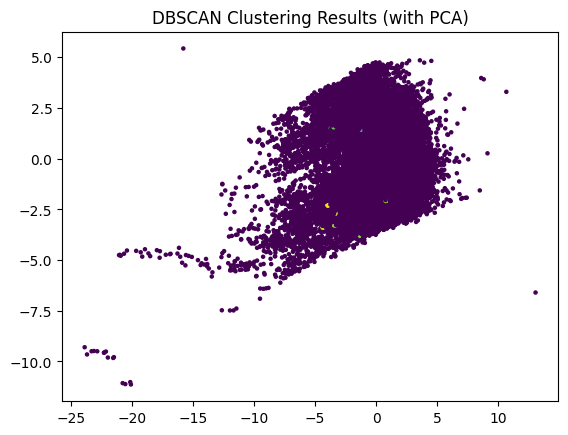

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(transformed_df)

# Visualize clustering results
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=dbscan.labels_, cmap='viridis', s=5)
plt.title("DBSCAN Clustering Results (with PCA)")
plt.show()

- A noise ratio of 99.5% indicates that DBSCAN is unable to include most of your dataset into clusters.
- Although the Silhouette, Davies-Bouldin and Calinski-Harabasz scores appear high, these metrics can be misleading because they focus on a small number of clusters. The high noise ratio is not directly reflected in these scores.